In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## ``查找缺失值``

### ``列缺失值``

In [3]:
round(100 * (data.isnull().sum() / len(data)), 2).sort_values(ascending=False)

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64

### ``行缺失值``

In [4]:
round(100 * (data.isnull().sum(axis=1) / len(data)), 2).sort_values(ascending=False)

284806    0.0
94937     0.0
94931     0.0
94932     0.0
94933     0.0
         ... 
189864    0.0
189863    0.0
189862    0.0
189861    0.0
0         0.0
Length: 284807, dtype: float64

没有发现缺失值

## ``去掉重复行``

In [5]:
card_d=data.copy()
card_d.drop_duplicates(subset=None, inplace=True)

In [6]:
data.shape

(284807, 31)

In [7]:
card_d.shape

(283726, 31)

行数有变化，说明里面有重复值,要去掉

In [8]:
data = card_d
del card_d

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


发现Amount属性数据很大，为防止影响模型训练，对其进行标准化

Text(0, 0.5, 'Frequency')

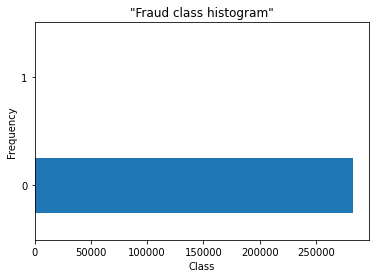

In [11]:
data['Class'].value_counts().plot(kind='barh', sharey=True)
plt.title('"Fraud class histogram"')
plt.xlabel("Class")
plt.ylabel("Frequency")

In [12]:
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

欺诈分类1有473个，非欺诈分类283253，数据分布极度不均衡

查看数据分布

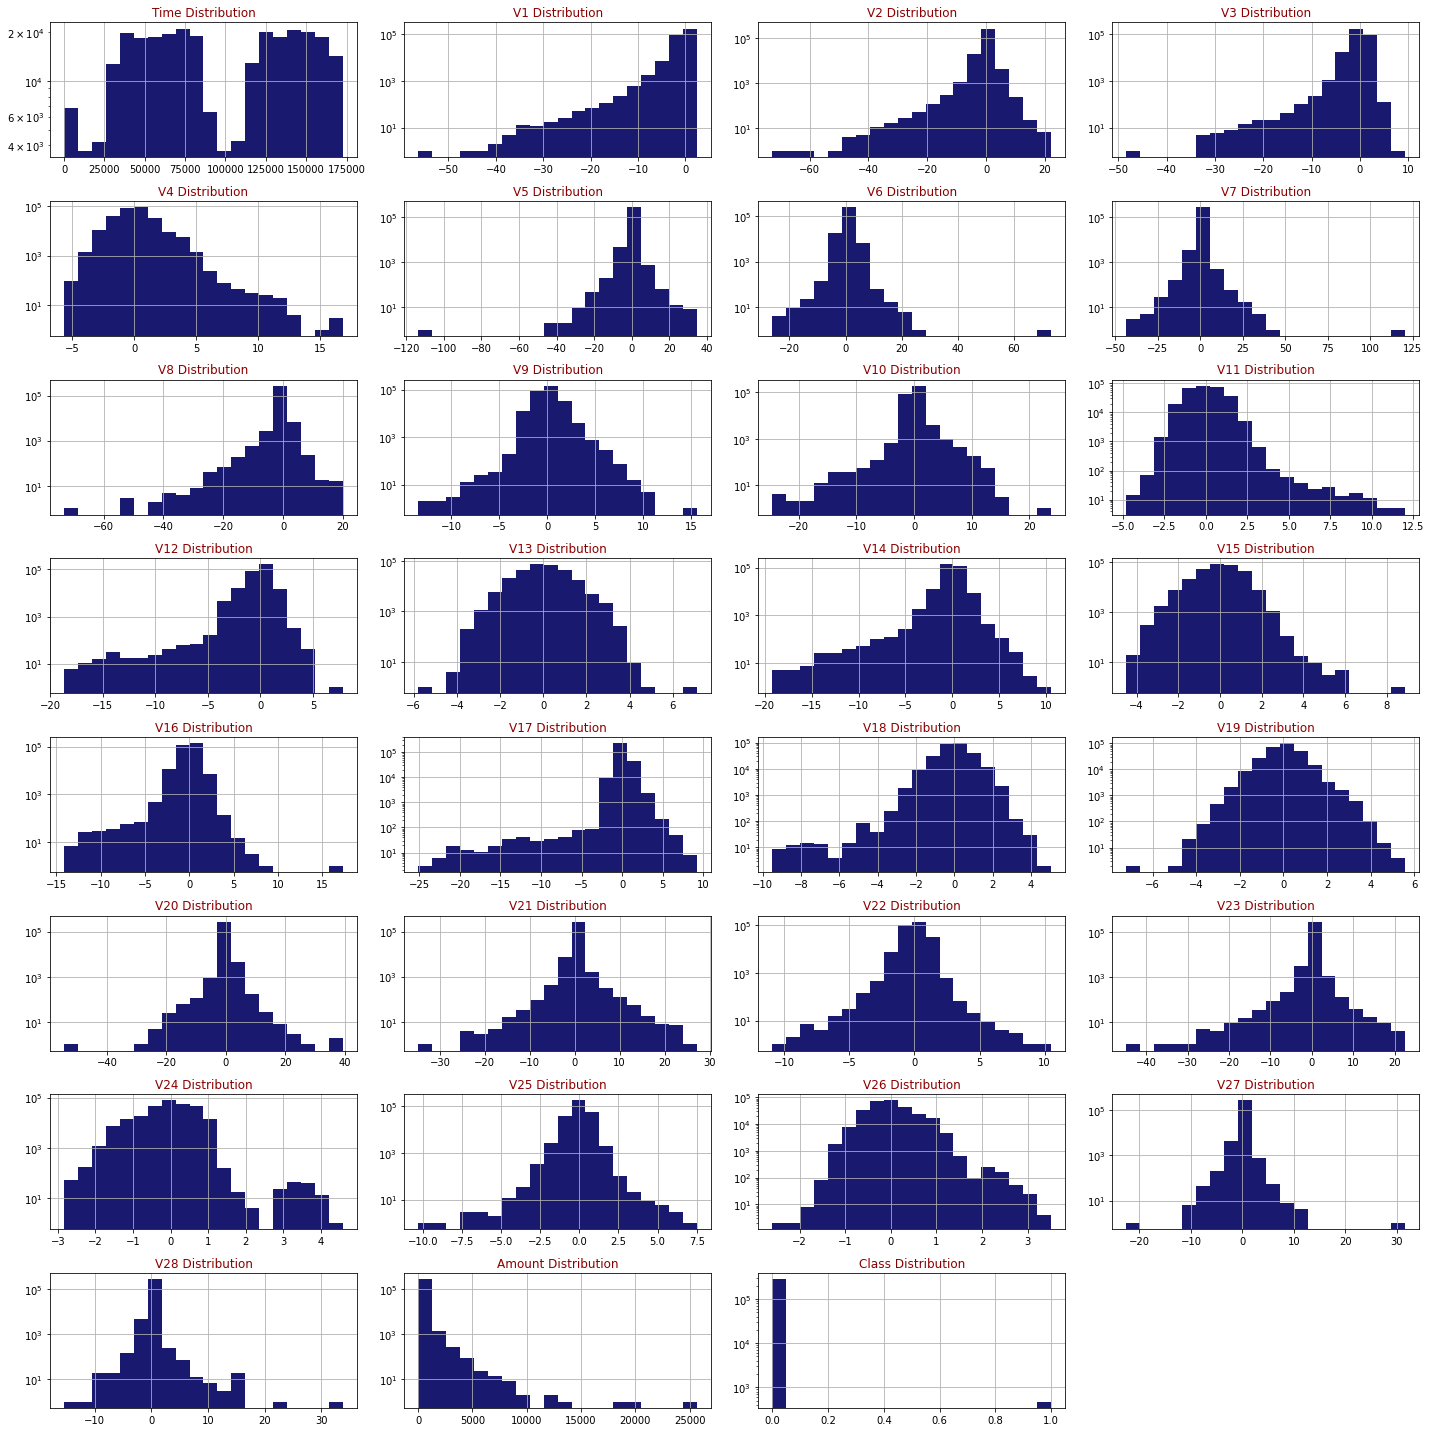

In [13]:
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins=20, ax=ax, facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()
    plt.show()
draw_histograms(data, data.columns, 8, 4)

In [14]:
data['Amount'].values.reshape(-1, 1)

array([[149.62],
       [  2.69],
       [378.66],
       ...,
       [ 67.88],
       [ 10.  ],
       [217.  ]])

In [15]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813


## 下采样

In [16]:
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

#欺诈记录数
number_records_fraud = len(data[data['Class'] == 1])
#诈骗记录的index值
fraud_indices = np.array(data[data['Class'] == 1].index)
#非诈骗的index值
normal_indices = data[data.Class == 0].index

random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)

#合并欺诈和随机选择的非欺诈数据集的index
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
#根据合并的index得到数据集
under_sample_data = data.loc[under_sample_indices,:]

X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']

print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  946


进行模型训练

In [17]:
from sklearn.model_selection import train_test_split
#下采样前训练集和数据集的分布
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('下采样  前  训练集和数据集的分布')
print("Number transactions train dataset: ", len(x_train))
print("Number transactions test dataset: ", len(x_test))
print("Total number of transactions: ", len(x_train)+len(x_test))
print("")

#下采样后训练集和数据集的分布
x_train_undersample, x_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample,
                                                                                                    y_undersample,
                                                                                                    test_size=0.3,
                                                                                                    random_state=42)
print('下采样  后  训练集和数据集的分布')
print("Number transactions train dataset: ", len(x_train_undersample))
print("Number transactions test dataset: ", len(x_test_undersample))
print("Total number of transactions: ", len(x_train_undersample)+len(x_test_undersample))

下采样  前  训练集和数据集的分布
Number transactions train dataset:  198608
Number transactions test dataset:  85118
Total number of transactions:  283726

下采样  后  训练集和数据集的分布
Number transactions train dataset:  662
Number transactions test dataset:  284
Total number of transactions:  946


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, classification_report

``交叉验证``

In [19]:
def  printing_Kfold_scores(x_train_data, y_train_data):
    #5折
    fold = KFold(n_splits=5, shuffle=False)
    #正则化强度
    c_param_range = [0.01,0.1,1,10,100]
    results_table = pd.DataFrame(index=range(len(c_param_range), 2), columns=['C_parameter','Mean recall score'], dtype=np.float64)
    results_table['C_parameter'] = c_param_range
    
    
    j=0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')
        
        
        recall_accs = []
        # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
        for iteration, indices in enumerate(fold.split(x_train_data), start=1):
            lr = LogisticRegression(C = c_param, penalty='l2')
            
            x_train_folds = x_train_data.iloc[indices[0]]
            y_train_folds = (y_train_data.iloc[indices[0]])
            x_test_folds = x_train_data.iloc[indices[1]]
            y_test_folds = (y_train_data.iloc[indices[1]])
            
            lr.fit(x_train_folds, y_train_folds)
            
            y_pred_undersample = lr.predict(x_test_folds)
            
            recall_acc = recall_score(y_test_folds, y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration, 'recall score = ', recall_acc)
        results_table.loc[j, 'Mean recall score'] = np.mean(recall_accs)
        j+=1
        print("")
        print('Mean recall score ', np.mean(recall_accs))
        print('')
    best_c = results_table.iloc[results_table['Mean recall score'].idxmax()]['C_parameter']
    print('*********************最高召回率对应参数**************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')     
    return best_c
            

In [20]:
best_c = printing_Kfold_scores(x_train_undersample, y_train_undersample)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 recall score =  0.8518518518518519
Iteration  2 recall score =  0.9142857142857143
Iteration  3 recall score =  0.8983050847457628
Iteration  4 recall score =  0.7692307692307693
Iteration  5 recall score =  0.8732394366197183

Mean recall score  0.8613825713467632

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 recall score =  0.8765432098765432
Iteration  2 recall score =  0.9285714285714286
Iteration  3 recall score =  0.9152542372881356
Iteration  4 recall score =  0.8076923076923077
Iteration  5 recall score =  0.9295774647887324

Mean recall score  0.8915277296434294

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 recall score =  0.8888888888888888
Iteration  2 recall score =  0.9285714285714286
Iteration  3 recall scor

In [21]:
def plot_precision_recall_VS_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label='Precision')
    plt.plot(thresholds, recalls[:-1], "g--", label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0, 1.1])

In [24]:
for i, j in itertools.product(range(2), range(2)):
    print(i, j)

0 0
0 1
1 0
1 1


In [23]:
import itertools
def plot_confusion_matrix(cnf_matrix, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    #设置阈值
    thresh = cnf_matrix.max() / 2
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('predicted label')

# ------------------------------------------------------------------------------------------------------------------
                             ``预测值``                                                 
                           N'        P'                                                                
                Negative      TN        FP                            
          实际值                                                                             
          
                Positive      FN       TP    
            
            
- 召回率   Recall = TP / (TP + FN)
- 模型精度  accuracy of the model = TP+TN/(TP+TN+FP+FN)
- 错误率   Missclassification = 1-Accuracy
- TPR 正例被预测成正例的概率   Sensitivity or True Positive Rate = TP/(TP+FN)
- TNR 负例被预测成负例的概率   Specificity or True Negative Rate = TN/(TN+FP)
- 预测正例正确的精度  Positive Predictive value = TP/(TP+FP)
- 预测负例正确的精度  Negative predictive Value = TN/(TN+FN)

Recall metric in the testing dataset:  0.9357142857142857
auccuracy of the model in the testing dataset:  0.954225352112676
TPR in the testing dataset:  0.9703703703703703
TNR metric in the testing dataset:  0.9395973154362416


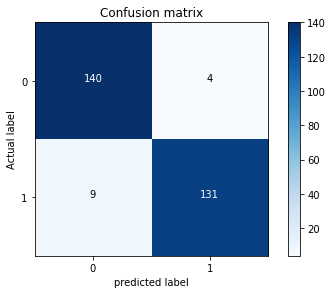

In [25]:
from sklearn.metrics import precision_recall_curve
lr = LogisticRegression(C=best_c, penalty='l2')
lr.fit(x_train_undersample, y_train_undersample)
y_pred_undersample = lr.predict(x_test_undersample)

cnf_matrix = confusion_matrix(y_test_undersample, y_pred_undersample)
# precisions, recalls, thresholds = precision_recall_curve(y_test_undersample, y_pred_undersample)
# print(y_test_undersample, y_pred_undersample)
# print(precisions, recalls, thresholds)
np.set_printoptions(precision=2)#控制输出小数点两位数

#recall = TP / (TP + FN)
#模型精度 acuuracy of the model = TP+TN/(TP+TN+FP+FN)
# TPR 正例被预测成正例的概率 Sensitivity or True Positive Rate = TP/(TP+FN)
# TNR 负例被预测成负例的概率 Specificity or True Negative Rate = TN/(TN+FP)
print('Recall metric in the testing dataset: ', cnf_matrix[1, 1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1]))
print('auccuracy of the model in the testing dataset: ',( cnf_matrix[0, 0] + cnf_matrix[1, 1] )/ cnf_matrix.sum())
print('TPR in the testing dataset: ', cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[0, 1]))
print('TNR metric in the testing dataset: ', cnf_matrix[0, 0] / (cnf_matrix[0, 0] + cnf_matrix[1, 0]))

class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=class_names,
                      title='Confusion matrix')
# plt.show()
# plt.figure()
# plot_precision_recall_VS_threshold(precisions, recalls, thresholds)
# plt.show()
# import seaborn as sns
# sns.heatmap(cnf_matrix, annot=True,fmt='d',cmap="YlGnBu")

利用训练的模型对x_test测试集进行测试

Recall metric in the testing dataset:  0.9104477611940298
auccuracy of the model in the testing dataset:  0.9519255621607651
TPR in the testing dataset:  0.029033793431699192
TNR metric in the testing dataset:  0.9998516980572445


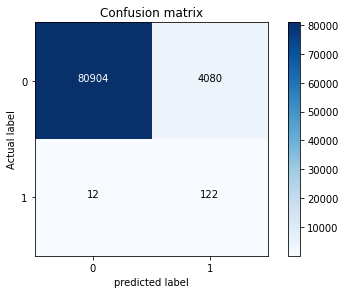

In [26]:
lr = LogisticRegression(C = best_c, penalty='l2')
lr.fit(x_train_undersample, y_train_undersample)
y_pred = lr.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print('auccuracy of the model in the testing dataset: ',( cnf_matrix[0, 0] + cnf_matrix[1, 1] )/ cnf_matrix.sum())
print('TPR in the testing dataset: ', cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[0, 1]))
print('TNR metric in the testing dataset: ', cnf_matrix[0, 0] / (cnf_matrix[0, 0] + cnf_matrix[1, 0]))

class_names = [0,1]
plt.figure()

plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

现在看看若不进行下采样时，用原来数据集进行训练的模型召回率

In [27]:
best_c = printing_Kfold_scores(x_train, y_train)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 recall score =  0.5555555555555556
Iteration  2 recall score =  0.5569620253164557
Iteration  3 recall score =  0.7049180327868853
Iteration  4 recall score =  0.5806451612903226
Iteration  5 recall score =  0.581081081081081

Mean recall score  0.59583237120606

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 recall score =  0.5555555555555556
Iteration  2 recall score =  0.5569620253164557
Iteration  3 recall score =  0.7377049180327869
Iteration  4 recall score =  0.6290322580645161
Iteration  5 recall score =  0.5945945945945946

Mean recall score  0.6147698703127819

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 recall score =  0.5555555555555556
Iteration  2 recall score =  0.5569620253164557
Iteration  3 recall score =

Recall metric in the testing dataset:  0.5522388059701493
auccuracy of the model in the testing dataset:  0.9991541154632393
TPR in the testing dataset:  0.8604651162790697
TNR metric in the testing dataset:  0.9992943832909963


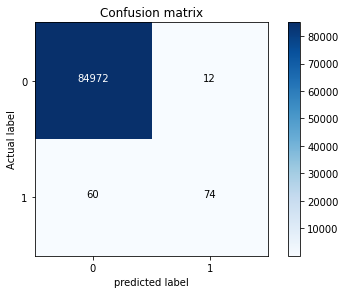

In [28]:
lr = LogisticRegression(C = best_c, penalty='l2')
lr.fit(x_train, y_train)
y_pred_undersample = lr.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print('auccuracy of the model in the testing dataset: ',( cnf_matrix[0, 0] + cnf_matrix[1, 1] )/ cnf_matrix.sum())
print('TPR in the testing dataset: ', cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[0, 1]))
print('TNR metric in the testing dataset: ', cnf_matrix[0, 0] / (cnf_matrix[0, 0] + cnf_matrix[1, 0]))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

- 与前面进行比较，可以发现
- 下采样的召回率有``0.9253731343283582``
- 而不进行下采样的召回率只有``0.5522388059701493``

Recall metric in the testing dataset:  0.9928571428571429
auccuracy of the model in the testing dataset:  0.75
TPR in the testing dataset:  0.6650717703349283
TNR metric in the testing dataset:  0.9866666666666667
---------------------------------------------
Recall metric in the testing dataset:  0.9857142857142858
auccuracy of the model in the testing dataset:  0.9190140845070423
TPR in the testing dataset:  0.8679245283018868
TNR metric in the testing dataset:  0.984
---------------------------------------------
Recall metric in the testing dataset:  0.9357142857142857
auccuracy of the model in the testing dataset:  0.9471830985915493
TPR in the testing dataset:  0.9562043795620438
TNR metric in the testing dataset:  0.9387755102040817
---------------------------------------------
Recall metric in the testing dataset:  0.9357142857142857
auccuracy of the model in the testing dataset:  0.9647887323943662
TPR in the testing dataset:  0.9924242424242424
TNR metric in the testing datase

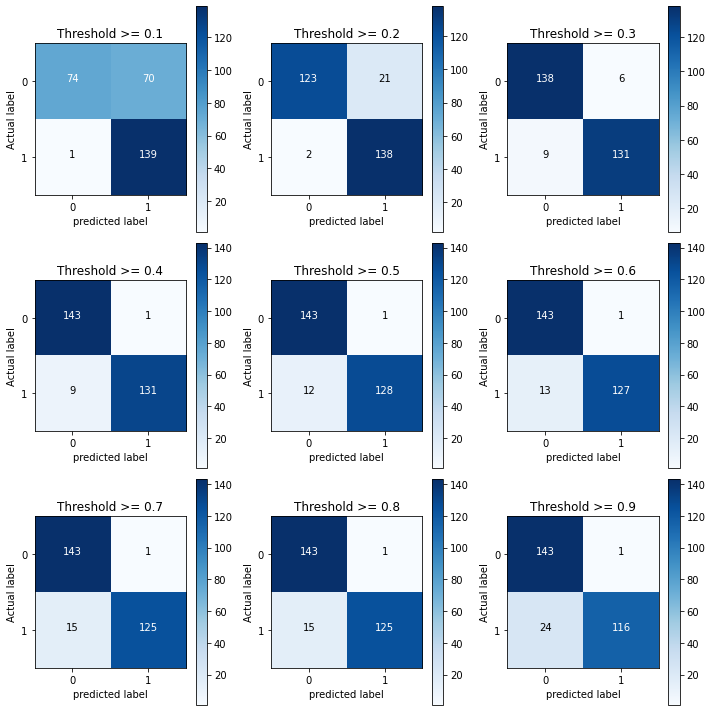

In [29]:
lr = LogisticRegression(C=0.01, penalty='l2')
lr.fit(x_train_undersample, y_train_undersample)
#  y_pred_undersample_proba  numpy.ndarray
y_pred_undersample_proba = lr.predict_proba(x_test_undersample)


thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
plt.figure(figsize=(10, 10))
np.set_printoptions(precision=2)

j = 1
for i in thresholds:
    #TP值
    y_test_predictions_high_recall = y_pred_undersample_proba[:, 1] > i
    plt.subplot(3, 3, j)
    j+=1
    cnf_matrix = confusion_matrix(y_test_undersample, y_test_predictions_high_recall)

    
    np.set_printoptions(precision=2)
    
    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    print('auccuracy of the model in the testing dataset: ',( cnf_matrix[0, 0] + cnf_matrix[1, 1] )/ cnf_matrix.sum())
    print('TPR in the testing dataset: ', cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[0, 1]))
    print('TNR metric in the testing dataset: ', cnf_matrix[0, 0] / (cnf_matrix[0, 0] + cnf_matrix[1, 0]))
    print('---------------------------------------------')
    
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title=f'Threshold >= {i}') 

关于要选什么阈值的问题


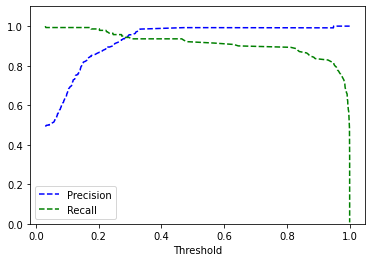

In [30]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test_undersample, y_pred_undersample_proba[:, 1])
# print(precisions, recalls, thresholds)
def plot_precision_recall_VS_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label='Precision')
    plt.plot(thresholds, recalls[:-1], "g--", label='Recall')
    plt.xlabel('Threshold')
    plt.legend()
    plt.ylim([0, 1.1])
plot_precision_recall_VS_threshold(precisions, recalls, thresholds)
plt.show()

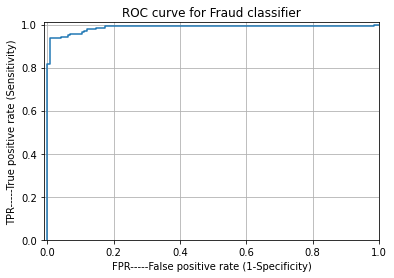

In [31]:
from sklearn.metrics import roc_curve
# print(y_pred_undersample_proba[:, 1])
plt.figure()
fpr, tpr, thresholds = roc_curve(y_test_undersample, y_pred_undersample_proba[:, 1])
# print(fpr, tpr, thresholds)
plt.plot(fpr,tpr)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC curve for Fraud classifier')
plt.xlabel('FPR-----False positive rate (1-Specificity)')
plt.ylabel('TPR-----True positive rate (Sensitivity)')
plt.grid(True)
plt.show()

## 除了下采样之外，还有一种方法是过采样
- 过采样是在样本中进行随机采用，用来补充数据量少的样本，使得不同标签的样本量达到均衡。

In [32]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [33]:
credit_cards=pd.read_csv('creditcard.csv')

columns=credit_cards.columns
columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [34]:
features_columns = columns.delete(len(columns)-1)
features = credit_cards[features_columns]
labels=credit_cards['Class']

In [35]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [36]:
len(labels_train[labels_train==0]), len(labels_train[labels_train==1])

(227451, 394)

根据labels_train可以发生数据不均衡，然后对偏少的数据过采样

In [37]:
oversampler = SMOTE(random_state=42)
os_features, os_labels = oversampler.fit_resample(features_train, labels_train)

In [38]:
len(os_labels[os_labels==1])

227451

class=1的数据由394------》227451

In [39]:
os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)
best_c = printing_Kfold_scores(os_features, os_labels)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 recall score =  0.8823529411764706
Iteration  2 recall score =  0.8974358974358975
Iteration  3 recall score =  0.9632597051923333
Iteration  4 recall score =  0.9545394592218069
Iteration  5 recall score =  0.958727192789624

Mean recall score  0.9312630391632265

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 recall score =  0.8888888888888888
Iteration  2 recall score =  0.8974358974358975
Iteration  3 recall score =  0.9626842547917313
Iteration  4 recall score =  0.9566608045724335
Iteration  5 recall score =  0.9561442075181359

Mean recall score  0.9323628106414172

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 recall score =  0.8888888888888888
Iteration  2 recall score =  0.8974358974358975
Iteration  3 recall score

Recall metric in the testing dataset:  0.8979591836734694
auccuracy of the model in the testing dataset:  0.9803553246023665
TPR in the testing dataset:  0.07351712614870509
TNR metric in the testing dataset:  0.9998206760512867


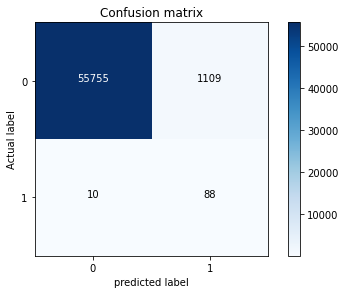

In [40]:
lr = LogisticRegression(C = best_c, penalty = 'l2')
lr.fit(os_features, os_labels)
y_pred = lr.predict(features_test)
y_pred_proba = lr.predict_proba(features_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(labels_test, y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1] / (cnf_matrix[1,0] + cnf_matrix[1,1]))
print('auccuracy of the model in the testing dataset: ',( cnf_matrix[0, 0] + cnf_matrix[1, 1] )/ cnf_matrix.sum())
print('TPR in the testing dataset: ', cnf_matrix[1, 1] / (cnf_matrix[1, 1] + cnf_matrix[0, 1]))
print('TNR metric in the testing dataset: ', cnf_matrix[0, 0] / (cnf_matrix[0, 0] + cnf_matrix[1, 0]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [41]:
y_pred_proba = lr.predict_proba(features_test)
y_pred_proba

array([[0.  , 1.  ],
       [0.96, 0.04],
       [0.91, 0.09],
       ...,
       [0.98, 0.02],
       [0.99, 0.01],
       [0.94, 0.06]])

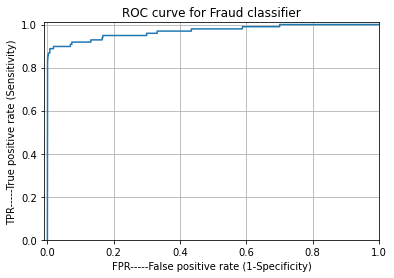

In [42]:
from sklearn.metrics import roc_curve
# print(y_pred_undersample_proba[:, 1])
plt.figure()
fpr, tpr, thresholds = roc_curve(labels_test, y_pred_proba[:, 1])
# print(fpr, tpr, thresholds)
plt.plot(fpr,tpr)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC curve for Fraud classifier')
plt.xlabel('FPR-----False positive rate (1-Specificity)')
plt.ylabel('TPR-----True positive rate (Sensitivity)')
plt.grid(True)
plt.show()